# Coordinate transformations with OMNI data

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences; egrimes(at)igpp.ucla.edu**

This notebook shows how to load OMNI data, combine the B-field components into a single variable, then use `cotrans` to transform the data to GSM coordinates, and finally plot the B-field in GSE and GSM coordinates

In [ ]:
!pip install pyspedas

In [2]:
import pyspedas

Load some OMNI data; we'll transform the B-field from GSE coordinates to GSM coordinates

In [3]:
pyspedas.omni.data(trange=['2015-10-16', '2015-10-17'])

08-Apr-22 18:16:57: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2015/
08-Apr-22 18:16:57: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf to omni_data/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf
08-Apr-22 18:16:58: Download complete: omni_data/hro2_1min/2015/omni_hro2_1min_20151001_v01.cdf


Time clip was applied to: IMF
Time clip was applied to: PLS
Time clip was applied to: IMF_PTS
Time clip was applied to: PLS_PTS
Time clip was applied to: percent_interp
Time clip was applied to: Timeshift
Time clip was applied to: RMS_Timeshift
Time clip was applied to: RMS_phase
Time clip was applied to: Time_btwn_obs
Time clip was applied to: F
Time clip was applied to: BX_GSE
Time clip was applied to: BY_GSE
Time clip was applied to: BZ_GSE
Time clip was applied to: BY_GSM
Time clip was applied to: BZ_GSM
Time clip was applied to: RMS_SD_B
Time clip was applied to: RMS_SD_fld_vec
Time clip was applied to: flow_speed
Time clip was applied to: Vx
Time clip was applied to: Vy
Time clip was applied to: Vz
Time clip was applied to: proton_density
Time clip was applied to: T
Time clip was applied to: NaNp_Ratio
Time clip was applied to: Pressure
Time clip was applied to: E
Time clip was applied to: Beta
Time clip was applied to: Mach_num
Time clip was applied to: Mgs_mach_num
Time clip wa

['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'NaNp_Ratio',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H']

The B-field components are stored as separate variables; to transform them using `cotrans`, we'll need to combine them into a single variable. We'll use `join_vec` from `pytplot` to do this:

In [4]:
from pytplot import join_vec

join_vec(['BX_GSE', 'BY_GSE', 'BZ_GSE'], new_tvar='B_GSE')

'B_GSE'

Now we can transform `B_GSE` to GSM coordinates using `cotrans`

In [5]:
from pyspedas import cotrans

cotrans(name_in='B_GSE', name_out='B_GSM', coord_in='gse', coord_out='gsm')

['gse', 'gsm']
Running transformation: subgse2gsm
Output variable: B_GSM


1

Set some plot metadata on our new variables

In [6]:
from pytplot import options

options('B_GSE', 'ytitle', 'OMNI B-field')
options('B_GSE', 'ysubtitle', '[nT]')
options('B_GSE', 'legend_names', ['Bx GSE', 'By GSE', 'Bz GSE'])

options('B_GSM', 'ytitle', 'OMNI B-field')
options('B_GSM', 'ysubtitle', '[nT]')
options('B_GSM', 'legend_names', ['Bx GSM', 'By GSM', 'Bz GSM'])

Now we can plot the B-field in GSE and GSM coordinates

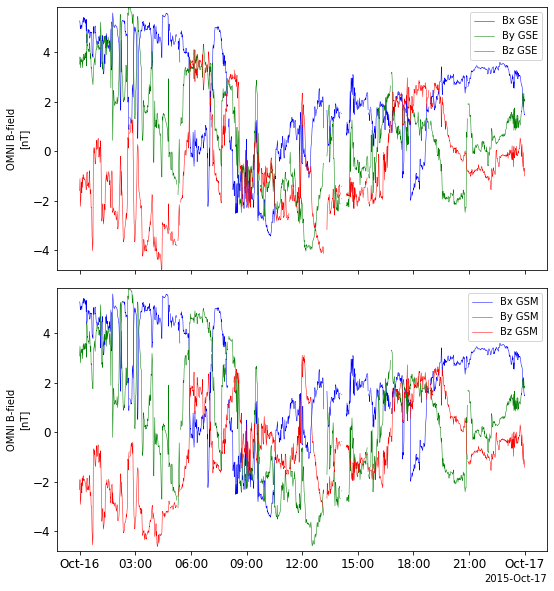

In [7]:
from pytplot import tplot

tplot(['B_GSE', 'B_GSM'])